# Clustering Analysis
## Kaustubh Pandit 

## Data Exploration and Visualization

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

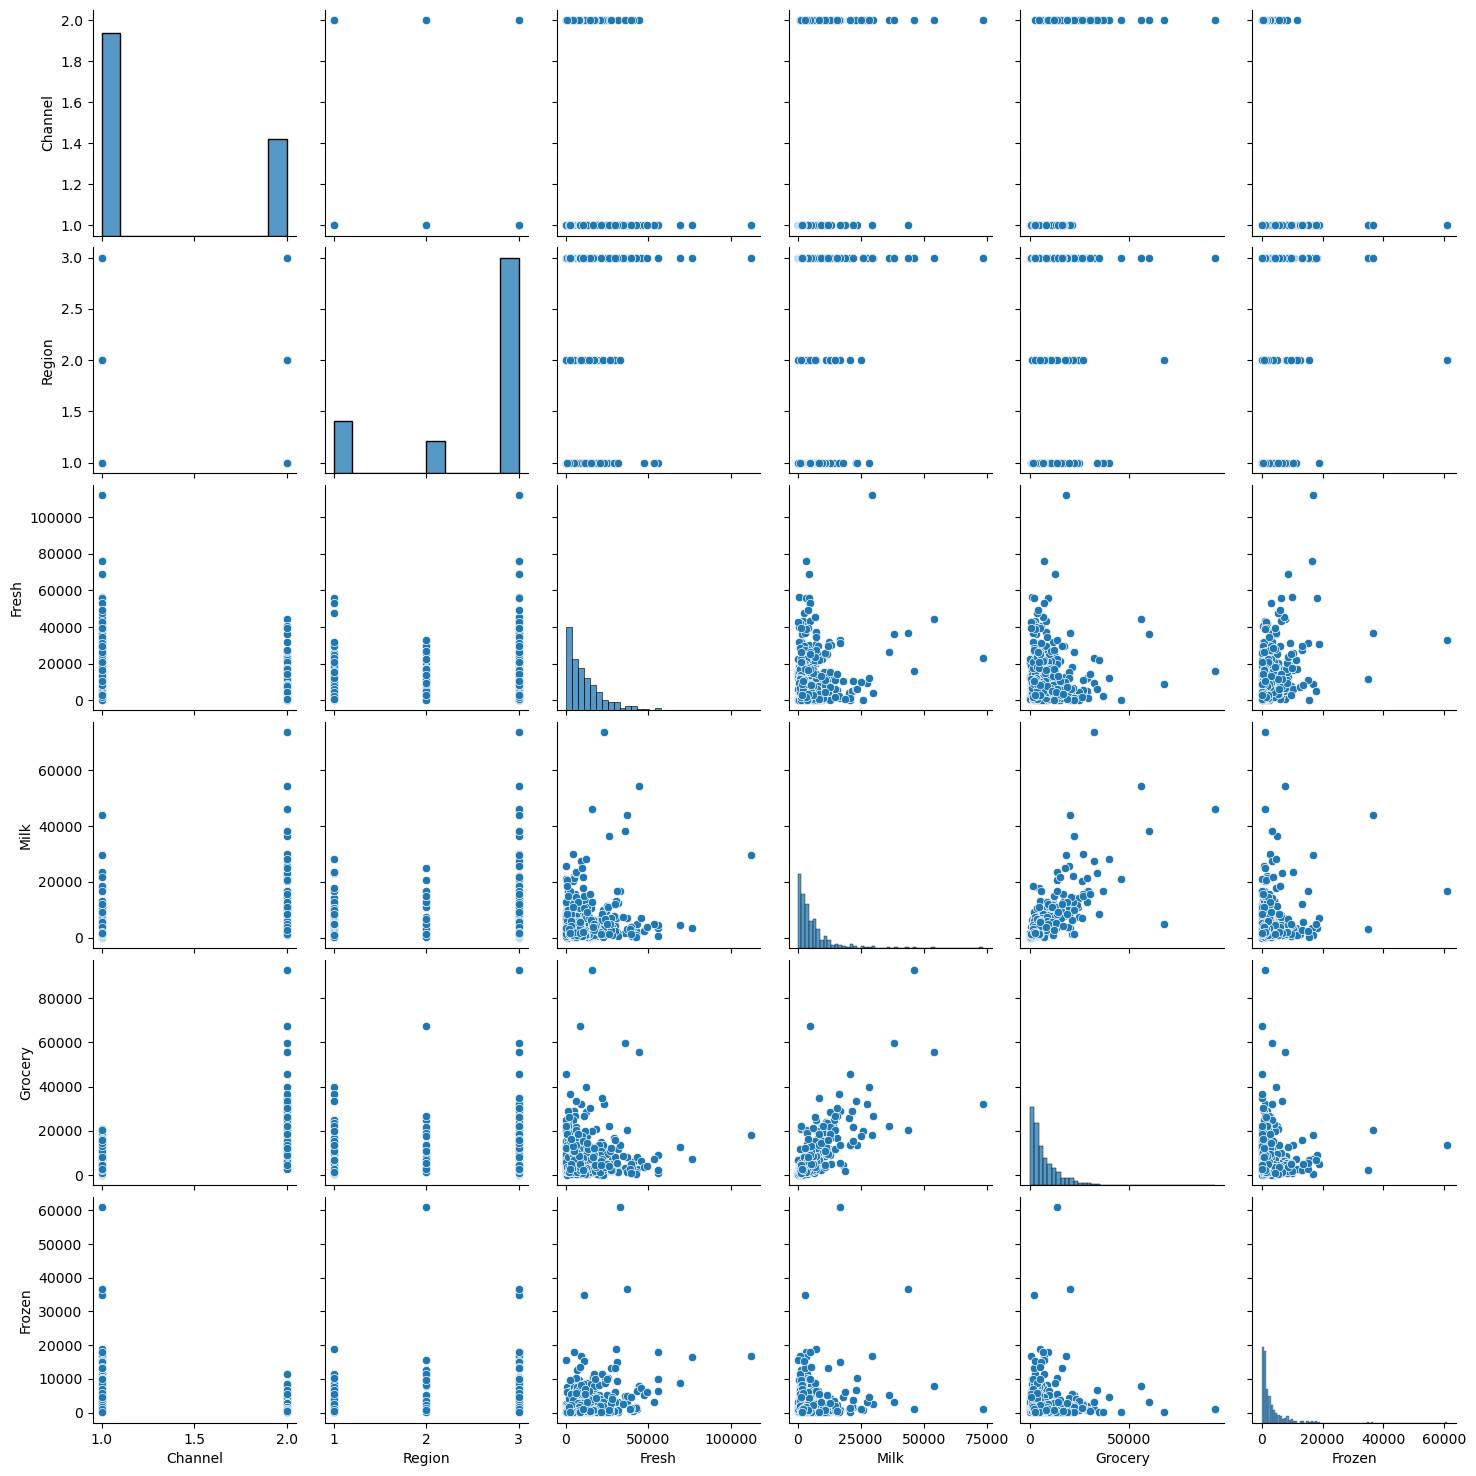

Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


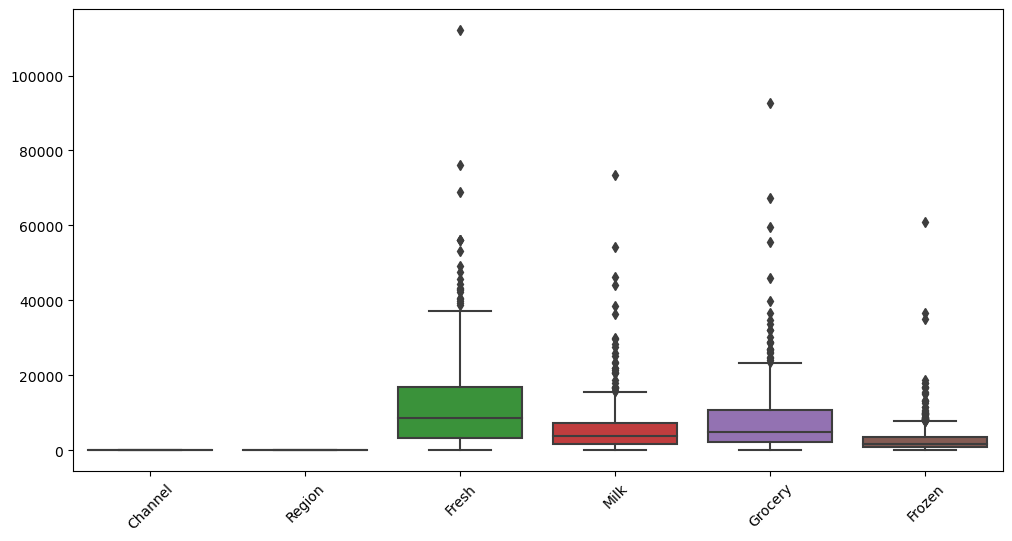

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Wholesale customers data.csv")

# Explore the structure of the dataset
print(data.head())
print(data.info())

# Examine the distribution of features
sns.pairplot(data.iloc[:, :6])  # Considering only the first 6 features for visualization
plt.show()

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check for outliers
# Visualize using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :6])
plt.xticks(rotation=45)
plt.show()


## Scaling Data

In [52]:
from sklearn.preprocessing import StandardScaler

# Select relevant attributes for clustering (excluding CHANNEL and REGION)
attributes_for_clustering = data.iloc[:, :6]

# Standardize the variables
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes_for_clustering)


## Elbow Method for Optimal K

C:\Users\kaust\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


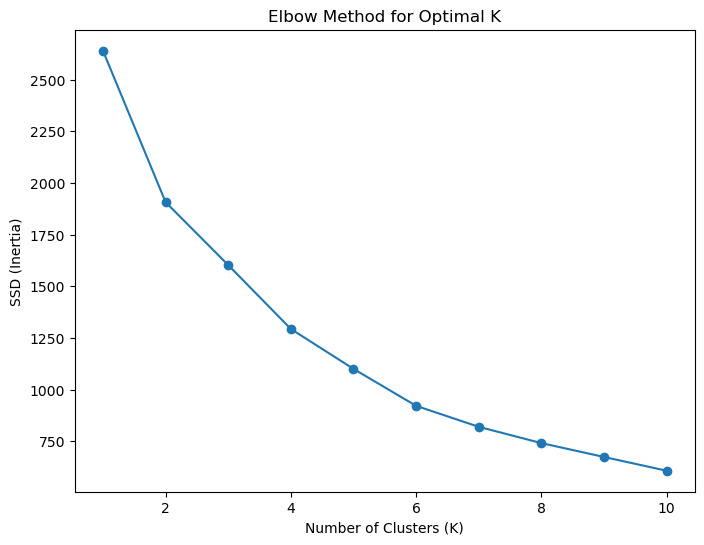

In [47]:
from sklearn.cluster import KMeans

# Experiment with different values of K using the elbow method
ssd = []  # Sum of squared distances

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(attributes_scaled)
    ssd.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSD (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow method, choose the optimal number of clusters (K)
# Let's say, for example, K = 3
optimal_k = 3

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(attributes_scaled)


## Taking optimal K clusters as 2

In [48]:
# Based on the elbow method, choose the optimal number of clusters (K)
# Let's say, for example, K = 3
optimal_k = 2

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(attributes_scaled)

# Analyze and interpret the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()
print("\nCluster Analysis:\n", cluster_analysis)



Cluster Analysis:
           Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.003378  2.510135  13442.908784   3176.375000   3831.726351   
1        1.979167  2.611111   9034.930556  11181.597222  16419.243056   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        3642.614865        792.459459  1245.750000  
1        1898.861111       7175.618056  2098.618056  


## Taking optimal K clusters as 4

In [49]:
# Based on the elbow method, choose the optimal number of clusters (K)
# Let's say, for example, K = 3
optimal_k = 4

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(attributes_scaled)

# Analyze and interpret the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()
print("\nCluster Analysis:\n", cluster_analysis)



Cluster Analysis:
           Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.000000  3.000000  13310.519231   3078.451923   3684.533654   
1        1.992481  2.654135   8084.706767   9584.609023  15355.180451   
2        1.625000  2.875000  40942.250000  42388.375000  39253.250000   
3        1.054945  1.307692  12183.945055   3254.714286   4130.923077   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         3436.019231        771.735577   1243.966346  
1         1427.864662       6815.691729   1628.571429  
2        16543.875000      15320.625000  11369.250000  
3         3458.252747        860.263736   1149.934066  


## Taking optimal K clusters as 6 


In [50]:
# Based on the elbow method, choose the optimal number of clusters (K)
# Let's say, for example, K = 3
optimal_k = 6

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(attributes_scaled)

# Analyze and interpret the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()
print("\nCluster Analysis:\n", cluster_analysis)



Cluster Analysis:
           Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        2.000000  2.416667  15712.833333  33342.250000  45322.833333   
1        1.000000  3.000000   8951.011364   2840.107955   3470.022727   
2        1.992000  2.680000   7751.664000   8931.680000  14018.872000   
3        1.047059  1.305882  10292.658824   3219.035294   4079.470588   
4        1.051282  2.769231  40807.358974   5038.179487   5358.769231   
5        1.000000  2.666667  26959.333333  21274.666667  11952.666667   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         2989.916667      22199.750000   3885.416667  
1         2695.056818        794.556818   1072.221591  
2         1455.144000       6027.344000   1590.400000  
3         3137.741176        874.035294   1079.682353  
4         6677.641026        828.846154   2276.512821  
5  

__I took optimal K clusters as 6 due to more obvious distinctions as well as since the elbow graph shows a somewhat consistent reduction in sharpness of slope until the K Value is 6 after which the slope is consistent in its depreciation.__


## Analysis with Optimal K Clusters as 6

Cluster 0: This cluster, predominantly Retail (2) and situated in the Other (3) region, exhibits a distinctive spending pattern. These customers display high expenditures on Milk, Grocery, and Detergents_Paper, indicating a likely presence of larger retail establishments or supermarkets. While their spending on Fresh products is moderate, Frozen and Delicatessen categories receive relatively lower attention.

Cluster 1: Representing primarily Catering (1) customers and located in the Other (3) region, Cluster 1 demonstrates a general low to moderate spending pattern. This group emphasizes Fresh products, suggesting a focus on providing fresh ingredients in catering services. Spending on other categories, including Milk, Grocery, and Detergents_Paper, is notably lower compared to other clusters.

Cluster 2: Predominantly Retail (2) and with a mix of regions, Cluster 2 showcases a balanced spending pattern across various product categories. These Retail customers allocate moderate expenditures on Fresh, Milk, Grocery, and Detergents_Paper. This cluster reflects a diverse group of retail establishments with a more evenly distributed spending profile.

Cluster 3: Comprising primarily Catering (1) customers and located in Lisbon (1), Cluster 3 represents a group with a moderate spending pattern on Fresh, Frozen, and Delicatessen products. However, spending on Milk, Grocery, and Detergents_Paper is relatively lower. This cluster may consist of catering businesses in the Lisbon region that prioritize a mix of fresh and frozen goods.

Cluster 4: Dominated by Catering (1) customers and spread across different regions, Cluster 4 stands out with an exceptionally high spending pattern on Fresh products. However, expenditures on other categories, such as Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen, are comparatively lower. This cluster likely includes high-end catering services focusing on premium, fresh ingredients.

Cluster 5: Consisting mainly of Catering (1) customers and located in the Other (3) region, Cluster 5 exhibits an extraordinary spending pattern on Frozen products. This suggests a unique segment of catering services that heavily rely on frozen goods, possibly specializing in frozen or pre-prepared foods. Spending on other categories is notably lower, emphasizing the specialization in the Frozen category.